<a href="https://colab.research.google.com/github/mobraine/Natural-Language-Understanding/blob/main/%E2%80%9CNL2DS_F2021_Assignment_3_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Vector Space Model of Word Meaning

The goal of this problem set is to make you familiar with vector space model of word meaning. You may reuse some of functions you coded in Assignment 1.

### Warning: This assignment may take substantial time to run if you are not optimizing your code. Make sure you have plenty of time to run if you are new to programming.

Go to https://drive.google.com/drive/folders/1Pe6D713L9S0GWwb_XzeLXAeNZOrBqZaN?usp=sharing and click add shortcut to drive. This will add the data required for this problem set to your Google drive.

<img src="https://drive.google.com/uc?id=1LqHisiziX8Ri94Xs6Cv8mhx6vivFM3kS" alt="Drawing" height="300"/>

Caution: Since this is real language on Twitter and deals with current events, some of it could be disturbing. In the later section of the course, we will deal with ethics and what is appropriate and what is not.



Run the below code snippet. It will generate a URL which generates an authorization code.* Enter it below to give Colab access to your Google drive.

*Copy function may not work. If so, manually copy the authorization code.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


When you run the `ls` command below, you should see the files in the tweets folder.




In [ ]:
!ls "/content/drive/My Drive/COMP 596/tweets"

20000_tweets.jsonl
20000_tweets.txt
covid-tweets-2020-08-10-2020-08-21.tokenized.txt
covid-tweets-2020-08-10-2020-08-21.trigrams.txt
GoogleNews-vectors-negative300.bin.gz
stop_words.txt


In [ ]:
# let's read tweets. These tweets are already tokenized and cleaned (Assignment 1)
tweets = open("/content/drive/My Drive/COMP 596/tweets/covid-tweets-2020-08-10-2020-08-21.tokenized.txt", "r").read().split("\n")
tweets = [tweet.split() for tweet in tweets]

print(len(tweets))
print(tweets[312868:312878])

312878
[['@USER', '@USER', 'covid-19', 'pass', 'it', 'around', 'share'], ['@USER', '@USER', '@USER', '@USER', 'if', 'the', 'coronavirus', 'vaccine', 'has', 'a', 'low', 'success', 'rate', 'and', 'is', 'only', 'developed', 'in', 'the', 'next', '2', 'years', 'this', 'means', '2', 'years', 'of', 'remote', 'education', 'would', 'be', 'required', 'the', 'decision', 'to', 'go', 'remote', 'should', 'be', 'based', 'on', 'risk', 'assessments', 'by', 'institutions', 'school', 'boards', 'have', 'been', 'downloaded', 'this', 'work'], ['anybody', 'URL'], ['i', 'still', 'blame', 'this', 'on', 'florida', '@USER', 'URL'], ['i', 'got', 'compliments', 'on', 'my', 'half', 'sleeve', 'today', 'while', 'getting', 'corona', 'tested', 'and', 'you', 'best', 'bet', 'i', 'put', 'my', 'tattoo', 'artists', 'plug', 'in', 'when', 'they', 'shoved', 'that', 'stick', 'up', 'my', 'nose', '@USER'], ['probably', 'my', 'best', 'pandemic', 'purchase', 'URL'], ['breaking', 'florida', 'has', 'become', 'the', '5th', 'state', 'i

## Problem 1.1: Word space model

Compute the most important context words of `ventilator`. Use Pointwise Mutual Information (PMI) to rank the context words (Refer to Lecture 4).

We define context as up to 3 words to the left and 3 words to the right. Ignore stop words and words that do not start with [a-z#]. Also ignore words that are not in the top 1000 frequent words.

These context words define the dimensions of the vector space model. Represent each word as a vector (dictionary/counter) of context words with PMI as the importance of the context word. Print the top 20 context words for each.

This is the sample output I got for `ventilator`. Your numbers need not match mine but the ranked list should look close to what I have.

```
[('put', 18.280538283196606), ('wearing', 17.587373569812726), ('even', 17.58651933524197), ('like', 17.402738298715878), ('covid', 17.172590097063086), ('patients', 16.894419647496004), ('use', 16.894298589380956), ('die', 16.89426559608771), ('days', 16.89415252713107), ('needed', 16.489137134110106), ('month', 16.48907033839664), ('weeks', 16.488913820220848), ('away', 16.48879303327717), ('week', 16.488739054051933), ('person', 16.488678720881293), ('good', 16.488160838026904), ('deaths', 16.487822204799755), ('go', 16.487564042558112), ('would', 16.48707075078768), ('one', 16.48706217686235), ('get', 16.486565870239033)]
```



Let's first load stop words.

In [ ]:
stop_words = set()
def load_stop_words():
  words = open("/content/drive/My Drive/COMP 596/tweets/stop_words.txt", "r").read().split("\n")
  for word in words:
    stop_words.add(word.strip())

load_stop_words()

stop_words.add('n’t')
print(len(stop_words))

135


In [ ]:
import string
import math
###### individual word frequencies ######
dictionary_single_token = {}
a_z_pond = string.ascii_lowercase + '#'
for tweety in tweets:
  for token in tweety:
    if token not in stop_words and token[0] in a_z_pond:
      if token not in dictionary_single_token:
        dictionary_single_token[token] = 1
      else:
        dictionary_single_token[token] += 1

Des_dict = sorted(dictionary_single_token, key=dictionary_single_token.get, reverse=True)
top_1000_freq_words = {}
for i in range(1000):
  top_1000_freq_words[Des_dict[i]] = dictionary_single_token.get(Des_dict[i])

######## ventilator context pairs
word_context_pairs = {}
for tweet in tweets:
  if len(tweet) >= 7:
    for i in range(3,len(tweet)-3):
      if (tweet[i],tweet[i-1]) not in word_context_pairs and tweet[i-1] in top_1000_freq_words:
        word_context_pairs[(tweet[i],tweet[i-1])] = 1
      elif (tweet[i],tweet[i-1]) in word_context_pairs and tweet[i-1] in top_1000_freq_words:
        word_context_pairs[(tweet[i],tweet[i-1])] += 1

      if (tweet[i],tweet[i-2]) not in word_context_pairs and tweet[i-2] in top_1000_freq_words:
        word_context_pairs[(tweet[i],tweet[i-2])] = 1
      elif (tweet[i],tweet[i-2]) in word_context_pairs and tweet[i-2] in top_1000_freq_words:
        word_context_pairs[(tweet[i],tweet[i-2])] += 1

      if (tweet[i],tweet[i-3]) not in word_context_pairs and tweet[i-3] in top_1000_freq_words:
        word_context_pairs[(tweet[i],tweet[i-3])] = 1
      elif (tweet[i],tweet[i-3]) in word_context_pairs and tweet[i-3] in top_1000_freq_words:
        word_context_pairs[(tweet[i],tweet[i-3])] += 1

      if (tweet[i],tweet[i+1]) not in word_context_pairs and tweet[i+1] in top_1000_freq_words:
        word_context_pairs[(tweet[i],tweet[i+1])] = 1
      elif (tweet[i],tweet[i+1]) in word_context_pairs and tweet[i+1] in top_1000_freq_words:
        word_context_pairs[(tweet[i],tweet[i+1])] += 1

      if (tweet[i],tweet[i+2]) not in word_context_pairs and tweet[i+2] in top_1000_freq_words:
        word_context_pairs[(tweet[i],tweet[i+2])] = 1
      elif (tweet[i],tweet[i+2]) in word_context_pairs and tweet[i+2] in top_1000_freq_words:
        word_context_pairs[(tweet[i],tweet[i+2])] += 1

      if (tweet[i],tweet[i+3]) not in word_context_pairs and tweet[i+3] in top_1000_freq_words:
        word_context_pairs[(tweet[i],tweet[i+3])] = 1
      elif (tweet[i],tweet[i+3]) in word_context_pairs and tweet[i+3] in top_1000_freq_words:
        word_context_pairs[(tweet[i],tweet[i+3])] += 1

  ############ corner case first 3 #####################
    i = 0
    if (tweet[i],tweet[i+1]) not in word_context_pairs and tweet[i+1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+1])] = 1
    elif (tweet[i],tweet[i+1]) in word_context_pairs and tweet[i+1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+1])] += 1

    if (tweet[i],tweet[i+2]) not in word_context_pairs and tweet[i+2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+2])] = 1
    elif (tweet[i],tweet[i+2]) in word_context_pairs and tweet[i+2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+2])] += 1

    if (tweet[i],tweet[i+3]) not in word_context_pairs and tweet[i+3] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+3])] = 1
    elif (tweet[i],tweet[i+3]) in word_context_pairs and tweet[i+3] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+3])] += 1

    i = 1
    if (tweet[i],tweet[i-1]) not in word_context_pairs and tweet[i-1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-1])] = 1
    elif (tweet[i],tweet[i-1]) in word_context_pairs and tweet[i-1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-1])] += 1

    if (tweet[i],tweet[i+1]) not in word_context_pairs and tweet[i+1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+1])] = 1
    elif (tweet[i],tweet[i+1]) in word_context_pairs and tweet[i+1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+1])] += 1

    if (tweet[i],tweet[i+2]) not in word_context_pairs and tweet[i+2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+2])] = 1
    elif (tweet[i],tweet[i+2]) in word_context_pairs and tweet[i+2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+2])] += 1

    if (tweet[i],tweet[i+3]) not in word_context_pairs and tweet[i+3] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+3])] = 1
    elif (tweet[i],tweet[i+3]) in word_context_pairs and tweet[i+3] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+3])] += 1

    i = 2
    if (tweet[i],tweet[i-1]) not in word_context_pairs and tweet[i-1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-1])] = 1
    elif (tweet[i],tweet[i-1]) in word_context_pairs and tweet[i-1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-1])] += 1

    if (tweet[i],tweet[i-2]) not in word_context_pairs and tweet[i-2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-2])] = 1
    elif (tweet[i],tweet[i-2]) in word_context_pairs and tweet[i-2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-2])] += 1

    if (tweet[i],tweet[i+1]) not in word_context_pairs and tweet[i+1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+1])] = 1
    elif (tweet[i],tweet[i+1]) in word_context_pairs and tweet[i+1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+1])] += 1

    if (tweet[i],tweet[i+2]) not in word_context_pairs and tweet[i+2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+2])] = 1
    elif (tweet[i],tweet[i+2]) in word_context_pairs and tweet[i+2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+2])] += 1

    if (tweet[i],tweet[i+3]) not in word_context_pairs and tweet[i+3] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+3])] = 1
    elif (tweet[i],tweet[i+3]) in word_context_pairs and tweet[i+3] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+3])] += 1

  ############ corner case last 3 #####################
    i = len(tweet)-3
    if (tweet[i],tweet[i-1]) not in word_context_pairs and tweet[i-1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-1])] = 1
    elif (tweet[i],tweet[i-1]) in word_context_pairs and tweet[i-1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-1])] += 1

    if (tweet[i],tweet[i-2]) not in word_context_pairs and tweet[i-2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-2])] = 1
    elif (tweet[i],tweet[i-2]) in word_context_pairs and tweet[i-2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-2])] += 1

    if (tweet[i],tweet[i-3]) not in word_context_pairs and tweet[i-3] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-3])] = 1
    elif (tweet[i],tweet[i-3]) in word_context_pairs and tweet[i-3] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-3])] += 1

    if (tweet[i],tweet[i+1]) not in word_context_pairs and tweet[i+1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+1])] = 1
    elif (tweet[i],tweet[i+1]) in word_context_pairs and tweet[i+1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+1])] += 1

    if (tweet[i],tweet[i+2]) not in word_context_pairs and tweet[i+2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+2])] = 1
    elif (tweet[i],tweet[i+2]) in word_context_pairs and tweet[i+2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+2])] += 1

    i = len(tweet)-2
    if (tweet[i],tweet[i-1]) not in word_context_pairs and tweet[i-1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-1])] = 1
    elif (tweet[i],tweet[i-1]) in word_context_pairs and tweet[i-1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-1])] += 1

    if (tweet[i],tweet[i-2]) not in word_context_pairs and tweet[i-2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-2])] = 1
    elif (tweet[i],tweet[i-2]) in word_context_pairs and tweet[i-2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-2])] += 1

    if (tweet[i],tweet[i-3]) not in word_context_pairs and tweet[i-3] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-3])] = 1
    elif (tweet[i],tweet[i-3]) in word_context_pairs and tweet[i-3] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-3])] += 1

    if (tweet[i],tweet[i+1]) not in word_context_pairs and tweet[i+1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+1])] = 1
    elif (tweet[i],tweet[i+1]) in word_context_pairs and tweet[i+1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i+1])] += 1

    i = len(tweet)-1
    if (tweet[i],tweet[i-1]) not in word_context_pairs and tweet[i-1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-1])] = 1
    elif (tweet[i],tweet[i-1]) in word_context_pairs and tweet[i-1] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-1])] += 1

    if (tweet[i],tweet[i-2]) not in word_context_pairs and tweet[i-2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-2])] = 1
    elif (tweet[i],tweet[i-2]) in word_context_pairs and tweet[i-2] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-2])] += 1

    if (tweet[i],tweet[i-3]) not in word_context_pairs and tweet[i-3] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-3])] = 1
    elif (tweet[i],tweet[i-3]) in word_context_pairs and tweet[i-3] in top_1000_freq_words:
      word_context_pairs[(tweet[i],tweet[i-3])] += 1
  # elif len(tweet) == 6:
  #   for i in range(6):
  #     ##### to the left #####
  #     for j in range(0, i):
  #       if (tweet[i],tweet[j]) not in word_context_pairs and tweet[j] in top_1000_freq_words:
  #         word_context_pairs[(tweet[i],tweet[j])] = 1
  #       elif (tweet[i],tweet[j]) in word_context_pairs and tweet[j] in top_1000_freq_words:
  #         word_context_pairs[(tweet[i],tweet[j])] += 1
  #     for k in range(i+1, 6):
  #       if (tweet[i],tweet[k]) not in word_context_pairs and tweet[k] in top_1000_freq_words:
  #         word_context_pairs[(tweet[i],tweet[k])] = 1
  #       elif (tweet[i],tweet[k]) in word_context_pairs and tweet[k] in top_1000_freq_words:
  #         word_context_pairs[(tweet[i],tweet[k])] += 1

In [ ]:
print(word_context_pairs[('ventilator', 'weeks')])
print(dictionary_single_token['ventilator'])
# print(top_1000_freq_words[])

4
155


In [ ]:
lenl6 = 0
for tweet in tweets:
  if 'pandemic' in tweet and 'ventilator' in tweet:
    lenl6 += 1
print(lenl6)

10


Let's build the word vectors

In [ ]:
def PMI(word1, word2):
  # You have to store frequencies of individual words and (word, context word)
  # pairs to compute this. You can compute them beforehand in order to avoid
  # counting every time when this function is called.
  # Write your code
  if (word1, word2) not in word_context_pairs:
    return 0
  else:
    return math.log(word_context_pairs[(word1, word2)]*len(tweets)/(dictionary_single_token[word1]*top_1000_freq_words[word2]))*10
    # return math.log(word_context_pairs[(word1, word2)]*len(dictionary_single_token.keys())/(dictionary_single_token[word1]*top_1000_freq_words[word2]))

def build_word_vector(word):
  # Write your code
  vector = []
  for context_word in iter(top_1000_freq_words.keys()):
    vector.append((context_word, PMI(word, context_word)))
  return sorted(vector,key=lambda vector: vector[1], reverse=True)

def print_top_dimensions(word_vector, n):
  # print top n dimensions sorted in the order of importance.
  print(word_vector[:n])

v1 = build_word_vector('ventilator')
print_top_dimensions(v1, 20) # print top 20 dimensions along with their weights

[('put', 18.08528776369431), ('patient', 17.536399385888018), ('tried', 17.088772210728337), ('wearing', 10.838926919438507), ('needed', 10.778092080403175), ('spent', 10.662316546978747), ('enjoy', 10.29504362977718), ('weeks', 9.927405222881896), ('avoid', 9.80780246825218), ('governors', 9.781417228670367), ('days', 9.611589502378909), ('orders', 9.242825531943076), ('minister', 9.217887863159051), ('brain', 9.094123907148564), ('suffering', 8.94760113927986), ('word', 8.578731241209248), ('except', 8.485707314586111), ('totally', 8.40501523410164), ('patients', 8.088604657910466), ('among', 7.890360280062021)]


## Problem 1.2: Compute the word similarity between words using Cosine Similarity.

Compute cosine similarity between the following pair of words:
```
('ventilator', 'covid-19')
('ventilator', 'lockdown')
('ventilator', 'mask')
('ventilator', 'ppe')
```

Outputs of my code are:
```
('ventilator', 'covid-19') 0.17076006036635358
('ventilator', 'lockdown') ...
('ventilator', 'mask') 0.19229601085517933
('ventilator', 'ppe') ...
```


In [ ]:
def cosine_similarity(vector1, vector2):
  # write your code
  sum_xy = 0
  sum_x2 = 0
  sum_y2 = 0

  for i in range(len(vector1)):
    sum_xy += vector1[i][1]*vector2[i][1]
    sum_x2 += vector1[i][1]**2
    sum_y2 += vector2[i][1]**2
  return sum_xy/(math.sqrt(sum_x2)*math.sqrt(sum_y2))

ventilator = build_word_vector('ventilator')
covid19 = build_word_vector('covid-19')
lockdown = build_word_vector('lockdown')
mask = build_word_vector('mask')
ppe = build_word_vector('ppe')

print(('ventilator', 'covid-19'), cosine_similarity(ventilator, covid19))
print(('ventilator', 'lockdown'), cosine_similarity(ventilator, lockdown))
print(('ventilator', 'mask'), cosine_similarity(ventilator, mask))
print(('ventilator', 'ppe'), cosine_similarity(ventilator, ppe))

('ventilator', 'covid-19') 0.3381079584127648
('ventilator', 'lockdown') 0.32338745767215515
('ventilator', 'mask') 0.3237044389776504
('ventilator', 'ppe') 0.665661601299983


## Problem 1.3: What can you tell about these words from the similarities?

1. `ventilator` when compared with `covid-19, lockdown, mask, ppe`,  ventilator is more similar to ppe, but not so similar to the other three.
2. `pandemic` when compared with `covid-19, lockdown, mask, ppe`, pandemic is not very similar to ppe, but are very similar to the other three.
3. `president` compared with `trump, biden`, president is similar to both trump and biden.
4. `trudeau` compared with `trump, biden`, trudeau is not similar to trump or biden.



In [ ]:
pandemic = build_word_vector('pandemic')
president = build_word_vector('president')
trump = build_word_vector('trump')
biden = build_word_vector('biden')
trudeau = build_word_vector('trudeau')

print(('pandemic', 'covid-19'), cosine_similarity(pandemic, covid19))
print(('pandemic', 'lockdown'), cosine_similarity(pandemic, lockdown))
print(('pandemic', 'mask'), cosine_similarity(pandemic, mask))
print(('pandemic', 'ppe'), cosine_similarity(pandemic, ppe))

print(('president', 'trump'), cosine_similarity(president, trump))
print(('president', 'biden'), cosine_similarity(president, biden))
print(('trudeau', 'trump'), cosine_similarity(trudeau, trump))
print(('trudeau', 'biden'), cosine_similarity(trudeau, biden))

('pandemic', 'covid-19') 0.992286870602103
('pandemic', 'lockdown') 0.9908631451969823
('pandemic', 'mask') 0.9920898357410891
('pandemic', 'ppe') 0.6747698249027229
('president', 'trump') 0.9776325450304912
('president', 'biden') 0.9948909501209592
('trudeau', 'trump') 0.5254691555837846
('trudeau', 'biden') 0.5717781624637127


# Let's play with word2vec

First let's load word2vec. I am using [gensim](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html) but feel free to use any libraries or tools.

In [ ]:
from gensim.models import KeyedVectors

EMBEDDING_FILE = '/content/drive/My Drive/COMP 596/tweets/GoogleNews-vectors-negative300.bin.gz' # from above
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

## Problem 1.4: Compute the top 5 similar words of `ventilator` using word2vec?

In [ ]:
# Write your code here
sims = word2vec.most_similar(['ventilator'],topn=5)

In [ ]:
print(sims)

[('respirator', 0.7864563465118408), ('mechanical_ventilator', 0.7063840627670288), ('intensive_care', 0.6809945702552795), ('ventilators', 0.6683582067489624), ('breathing_tube', 0.6665509343147278)]


# Problem 1.5: Word analogy

If I told you the plural of `car` is `cars`, can you automatically find the plural of `hyothesis` and `man` using word2vec.

Similarly, if I told you a newborn `dog` is called `puppy`, can you automatically find what are the newborn words of `cat` and `sheep` using word2vec?


In [ ]:
# Write your code here
hypothesises = word2vec.most_similar(positive=['cars','hypothesis'],negative=['car'],topn=1)
men = word2vec.most_similar(positive=['cars','man'],negative=['car'],topn=1)
kitty = word2vec.most_similar(positive=['puppy','cat'],negative=['dog'],topn=1)
lamb = word2vec.most_similar(positive=['puppy','sheep'],negative=['dog'],topn=1)

print(hypothesises)
print(men)
print(kitty)
print(lamb)

[('hypotheses', 0.6453900337219238)]
[('men', 0.5470781326293945)]
[('kitten', 0.7634989619255066)]
[('lambs', 0.7109252214431763)]


# 2. Topic Models

The goal of this part is to make you familiar with topic models. You may reuse some of functions you coded for the previous assignments.

## Data Download and Setup

Let us start by downloading the news section of the Brown corpus:

In [ ]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
documents = [brown.words(fileid) for fileid in brown.fileids()]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


Let us inspect some of the documents:

In [ ]:
print("The news section of the Brown corpus contains {} documents.".format(len(documents)))
for i in range(3):
  document = documents[i]
  print("Document {} has {} words: {}".format(i, len(document), document))

The news section of the Brown corpus contains 500 documents.
Document 0 has 2242 words: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
Document 1 has 2277 words: ['Austin', ',', 'Texas', '--', 'Committee', 'approval', ...]
Document 2 has 2275 words: ['Several', 'defendants', 'in', 'the', 'Summerdale', ...]


Finally, let us download a list of stopwords for later.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
print(stopwords_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

## Problem 2.1: Document-Term Matrix

Create a document-term matrix with tf-idf. You should preprocess documents by: 1) lowercasing words, 2) excluding stopwords, and 3) including alphanumeric strings only.

```python
import numpy as np
def create_tfidf_matrix(documents: List[List[str]]) -> (np.array, List[str]):
  # Args:
  #   documents: list of documents, each document being a list of words.
  # Outputs:
  #   tfidf_matrix: np.array of shape (num_documents, vocabulary_size)
  #   vocabulary: a list of terms corresponding to the columns of the matrix.

tfidf_matrix, vocabulary = create_tfidf_matrix(documents)
```

How sparse is this matrix? Calculate the ratio between cells with value 0 and the total number of cells.


In [ ]:
import numpy as np
import re
import string
import math

######## preprocessing docs to include only lowercase, nonstop, alphanumeric words, and get the vocabulary so that np.array only have to append #######
alphanumeric = "^[a-z0-9]+$"
p = re.compile(alphanumeric)
docs = []
vocab = {}
term_in_doc = {}
for document in documents:
  doc=[]
  dictionary_single_token = {}
  for word in document:
    word=word.lower()
    if word not in stopwords_list and re.search(p, word):
      doc.append(word)
      ####### get vocabulary #########
      if word not in vocab:
        vocab[word] = 1
      ####### get each word frequency in a document and count the number of documents the word appears in ######
      if word not in dictionary_single_token and word not in term_in_doc:## first time in termindoc and first time in this doc
        dictionary_single_token[word] = 1
        term_in_doc[word] = 1
      elif word in term_in_doc and word not in dictionary_single_token: ## already in termindoc and first time in this doc:
        dictionary_single_token[word] = 1
        term_in_doc[word] += 1

  docs.append(doc)

####### docs is a compressed version of documents #########


def create_tfidf_matrix(documents):
  vocab_list = list(vocab.keys())
  matrix=np.array #### something
  matrix = np.empty((len(documents),len(vocab.keys())))
  # term_in_doc = {}
  for i in range(len(documents)):
    ###### for each document we get a dictionary containing all words in it, and compute the tf-idf on each word in that document #####
    dictionary_single_token = {}
    for word in documents[i]:
      if word not in dictionary_single_token:  #### note that we take tf to be just the word frequency itself, the word's tf-idf is just the sum of all occurance of that word in the document times idf ######
        dictionary_single_token[word] = (1/len(documents[i])) * math.log(500/term_in_doc[word])
      else:
        dictionary_single_token[word] += (1/len(documents[i])) * math.log(500/term_in_doc[word])

    for j in range(len(vocab.keys())):
      if vocab_list[j] in dictionary_single_token.keys():
        matrix[i][j] = dictionary_single_token[vocab_list[j]]
      else:
        matrix[i][j] = 0

    # matrix.append(init)

  return matrix, vocab_list



# tfidf_matrix, vocabulary = create_tfidf_matrix(documents)
tfidf_matrix, vocabulary = create_tfidf_matrix(docs)

In [ ]:
n_zeros = np.count_nonzero(tfidf_matrix==0)
ratio = n_zeros/(tfidf_matrix.shape[0]*tfidf_matrix.shape[1])
print(ratio)

0.9845266994447298


## Problem 2.2: Latent Semantic Analysis

We perform LSA to obtain document embeddings `U` and term embeddings `VT`.

```python
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(tfidf_matrix,
                              n_components=10,
                              n_iter=100,
                              random_state=42)
```

Define a function to find the 5 most relevant terms for each of the 10 latent dimensions (tip: you should make use of VT and the vocabulary).

```python
def extract_salient_words(VT: np.array,
                  vocabulary: List[str]
                  ) -> salient_words: dict[int, List[str]]:
  # Args:
  #  VT: a numpy array of size (n_components, vocabulary_size)
  #  vocabulary: a list of words of size vocabulary_size
  # Outputs:
  #  salient_words: a dictionary with the latent dimension indices as keys and a list of its 5 most salient words as values

salient_words = extract_salient_words(VT, vocabulary)

for key, value in salient_words:
  print("Concept {}: {}".format(str(key), " ".join(value)))
```

In [ ]:
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(tfidf_matrix,
                              n_components=10,
                              n_iter=100,
                              random_state=42)

def extract_salient_words(VT, vocabulary):
  salient_words = {}
  # print(VT[2])
  for i in range(VT.shape[0]):
    # print(i)
    ind = np.argpartition(VT[i], len(VT[i])-5)[-5:]
    # print(ind)
    sw = []
    for j in ind:
      sw.append(vocabulary[j])
    salient_words[i] = sw

  return salient_words

salient_words = extract_salient_words(VT, vocabulary)

for key, value in salient_words.items():
  print("Concept {}: {}".format(str(key), " ".join(value)))

Concept 0: q theorem operator polynomial af
Concept 1: diagonalizable theorem operator polynomial af
Concept 2: plug temperature arc holder anode
Concept 3: jess deegan mike anode phil
Concept 4: wtv sections clover nonspecific staining
Concept 5: information platform cell text dictionary
Concept 6: axis leveling accelerometer gyro platform
Concept 7: curve secants c tangent q
Concept 8: grams phil cattle milligrams feed
Concept 9: anniston eddie deegan phil mike


## Problem 2.3: Document Retrieval

Given a text query, view this as a mini document, and compare it to your documents in the low-dimensional space.

First, we need to create a vector $\mathbf{d}$, which is the tf-idf representation of the query. Then we project it into the semantic space with the linear map $\Sigma^{-1} V^\top$ learned above. This gives us a pseudo-document embedding $\hat{\mathbf{d}}$.

$$\hat{\mathbf{d}} = \Sigma^{-1} V^\top \mathbf{d}$$

Then, you will need to implement a function to calculate the cosine similarity between this embedded query and all the document embeddings.

Retrieve the indices of the top-3 documents with the highest cosine similarity with the following queries:


```python
query1 = ['T.', 'V.', 'Barker', 'developed', 'the', 'classification-angle', 'system']
query2 = ['imitation', 'vs.', 'formalism' 'in', 'philosophical', 'debates']
query3 = ['Krim', 'attended', 'the', 'University', 'of', 'North', 'Carolina', 'to', 'follow', 'Thomas', 'Wolfe']
```



In [ ]:
query1 = ['T.', 'V.', 'Barker', 'developed', 'the', 'classification-angle', 'system']
query2 = ['imitation', 'vs.', 'formalism', 'in', 'philosophical', 'debates']
query3 = ['Krim', 'attended', 'the', 'University', 'of', 'North', 'Carolina', 'to', 'follow', 'Thomas', 'Wolfe']

queries = []
for document in [query1,query2,query3]:
  doc=[]
  dictionary_single_token = {}
  for word in document:
    word=word.lower()
    if word not in stopwords_list and re.search(p, word):
      doc.append(word)
      ####### get vocabulary #########
      if word not in vocab:
        vocab[word] = 1
      ####### get each word frequency in a document and count the number of documents the word appears in ######
      if word not in dictionary_single_token and word not in term_in_doc:## first time in termindoc and first time in this doc
        dictionary_single_token[word] = 1
        term_in_doc[word] = 1
      elif word in term_in_doc and word not in dictionary_single_token: ## already in termindoc and first time in this doc:
        dictionary_single_token[word] = 1
        term_in_doc[word] += 1

  queries.append(doc)



def create_tfidf_matrix(documents):
  vocab_list = list(vocab.keys())
  matrix=np.array #### something
  matrix = np.empty((len(documents),len(vocab.keys())))
  # term_in_doc = {}
  for i in range(len(documents)):
    ###### for each document we get a dictionary containing all words in it, and compute the tf-idf on each word in that document #####
    dictionary_single_token = {}
    for word in documents[i]:
      if word not in dictionary_single_token:  #### note that we take tf to be just the word frequency itself, the word's tf-idf is just the sum of all occurance of that word in the document times idf ######
        dictionary_single_token[word] = (1/len(documents[i])) * math.log(501/term_in_doc[word]) ###### document number +1 for each query to account for increase
      else:
        dictionary_single_token[word] += (1/len(documents[i])) * math.log(501/term_in_doc[word]) ###### document number +1 for each query to account for increase

    for j in range(len(vocab.keys())):
      if vocab_list[j] in dictionary_single_token.keys():
        matrix[i][j] = dictionary_single_token[vocab_list[j]]
      else:
        matrix[i][j] = 0

    # matrix.append(init)

  return matrix, vocab_list


tfidf_matrix_3q, vocabulary = create_tfidf_matrix(queries)

In [ ]:
sigma_inv = np.zeros((Sigma.shape[0],Sigma.shape[0]))
for i in range(Sigma.shape[0]):
  sigma_inv[i][i] = 1/Sigma[i]

def retrie_similar_doc(embd):
  def cosine_similarity(vector1, vector2):
    # write your code
    sum_xy = 0
    sum_x2 = 0
    sum_y2 = 0

    for i in range(len(vector1)):
      sum_xy += vector1[i]*vector2[i]
      sum_x2 += vector1[i]**2
      sum_y2 += vector2[i]**2
    return sum_xy/(math.sqrt(sum_x2)*math.sqrt(sum_y2))

  cos_sim=[]
  for u in U:
    cos_sim.append(cosine_similarity(embd,u))
  return np.argpartition(cos_sim, len(cos_sim)-3)[-3:]


for vec in tfidf_matrix_3q:
  pseud_embed = sigma_inv.dot(VT.dot(vec))
  ind = retrie_similar_doc(pseud_embed)
  print(retrie_similar_doc(pseud_embed))
  # for i in ind:
  #   print(docs[i])



[138 218 373]
[350 244 204]
[177 126 240]


## Problem 2.4: Document Clustering

```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

num_clusters = 10
km = KMeans(n_clusters=num_clusters)
document_embeddings = U * Sigma
km.fit(document_embeddings)
clusters = km.labels_.tolist()
print(clusters)
```

Let us now plot the document embeddings and their clusters:

```python
import umap
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=42).fit_transform(document_embeddings)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, s=20, edgecolor='none')
plt.show()
```

What are the differences you observe by using a different number of `n_components` in LSA or `n_clusters` in K-Means?

1. Increase `n_clusters` shrinks the right half of the embeddings and creates more clusters in the left half.

2. change `n_components` in LSA completely changes the shape of embeddings.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

num_clusters = 50
km = KMeans(n_clusters=num_clusters)
document_embeddings = U * Sigma
km.fit(document_embeddings)
clusters = km.labels_.tolist()
print(clusters)



[46, 46, 12, 46, 46, 46, 46, 46, 19, 19, 28, 28, 28, 28, 28, 0, 48, 48, 20, 49, 49, 19, 19, 19, 19, 12, 12, 44, 0, 0, 49, 0, 48, 19, 46, 46, 19, 28, 28, 0, 46, 49, 12, 12, 46, 19, 19, 19, 20, 46, 46, 21, 0, 0, 19, 49, 0, 19, 46, 46, 19, 46, 49, 49, 20, 19, 19, 0, 19, 19, 19, 0, 49, 49, 0, 0, 49, 0, 21, 0, 0, 49, 20, 0, 0, 0, 49, 39, 49, 49, 19, 48, 49, 48, 48, 41, 46, 19, 49, 46, 37, 19, 49, 48, 49, 37, 37, 20, 49, 20, 20, 29, 32, 22, 37, 21, 49, 21, 37, 37, 37, 29, 49, 0, 39, 20, 49, 0, 0, 16, 41, 7, 12, 46, 12, 19, 12, 20, 39, 37, 20, 41, 21, 41, 37, 0, 0, 49, 49, 21, 37, 37, 41, 20, 49, 46, 0, 19, 0, 19, 0, 37, 21, 19, 0, 19, 37, 21, 19, 19, 48, 45, 48, 34, 39, 25, 11, 19, 28, 20, 46, 21, 48, 0, 46, 19, 19, 48, 46, 19, 46, 49, 45, 0, 49, 19, 49, 41, 46, 41, 0, 49, 45, 0, 41, 49, 0, 49, 41, 19, 46, 49, 19, 41, 48, 0, 49, 19, 41, 21, 21, 21, 48, 46, 19, 21, 49, 21, 21, 45, 20, 49, 49, 48, 49, 21, 0, 0, 0, 0, 48, 48, 21, 49, 49, 46, 48, 0, 11, 41, 20, 49, 0, 41, 0, 21, 49, 49, 49, 49, 

     |████████████████████████████████| 80 kB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 75.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=6f3711965c3afb3c0302b880d55fbe1dab6eba9952cb46bdde49b4f80029569d
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=181980288037c89ffdc8045c214138288925d7813da8eddfdc841a35cd1d3850
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


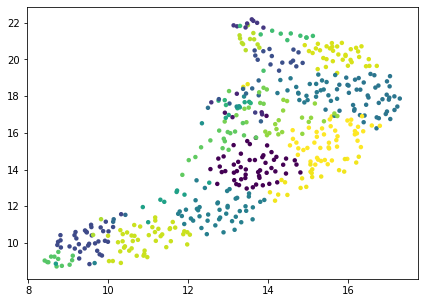

In [ ]:
!pip install umap-learn
import umap.umap_ as umap

embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=42).fit_transform(document_embeddings)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, s=20, edgecolor='none')
plt.show()

## Problem 2.5 Latent Dirichlet Allocation

Run LDA on `documents` using `sklearn` (find the documentation at this [link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation))

Make sure to specify `random_state=42` for replicability.

What are the topics allocated to each word of document number 13?

In [ ]:
print(documents[13])

['Philadelphia', ',', 'Jan.', '23', '--', 'Nick', ...]


In [ ]:
# Write your code here.
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5,random_state=42)

# doc13=[]
# dict13 = {}

# for word in documents[13]:
#   word=word.lower()
#   if word not in stopwords_list and re.search(p, word):
#     doc13.append(word)
#     if word not in dict13:
#       dict13[word] = 1
#     else:
#       dict13[word] += 1

# doc13freq = []
# for i in range(len(doc13)):
#   doc13freq.append(dict13[doc13[i]])

# print(doc13)
# print(doc13freq)
doc_topic_distr=lda.fit_transform(tfidf_matrix)
print(doc_topic_distr[13])

[0.05265934 0.05265934 0.05265934 0.78936262 0.05265934]


In [ ]:
# def print_top_words(model, feature_names, n_top_words):
#     for topic_id, topic in enumerate(model.components_):
#         print('\nTopic Nr.%d:' % int(topic_id + 1))
#         print(''.join([feature_names[i] + ' ' + str(round(topic[i], 2))
#               +' | ' for i in topic.argsort()[:-n_top_words - 1:-1]]))
# n_top_words = 4
# tf_feature_names = doc13
# print_top_words(lda, tf_feature_names, n_top_words)

In [ ]:
# words_topics = np.transpose(lda.components_)
# list_topics_for_each_word = []
# for i in range(words_topics.shape[0]):
#   list_topics_for_each_word.append(np.argmax(words_topics[i]))
# print(list_topics_for_each_word)
# print(list_topics_for_each_word.count(0))
# print(words_topics[:30])

It seems all words are assigned topic 1, which is league.